In [17]:
import pybaseball as pbb
import pandas as pd
import sklearn
import plotly as plt 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

This is a test.

In [104]:
k23 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\ClaytonKershaw2023.csv')
k22 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\ClaytonKershaw2022.csv')
k21 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\ClaytonKershaw2021.csv')
k20 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\ClaytonKershaw2020.csv')
k19 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\ClaytonKershaw2019.csv')
k18 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\ClaytonKershaw2018.csv')
k17 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\ClaytonKershaw2017.csv')
g23 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\GerritCole2023.csv')
g22 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\GerritCole2022.csv')
g21 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\GerritCole2021.csv')
g20 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\GerritCole2020.csv')
g19 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\GerritCole2019.csv')
g18 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\GerritCole2018.csv')
g17 = pd.read_csv(r'c:\Users\tober\Documents\School\PitchPrediction\Data\GerritCole2017.csv')
kseasons = [k23,k22,k21,k20,k19,k18,k17]
kershaw = pd.concat(kseasons)
gseason= [g23,g22,g21,g20,g19,g18,g17]


Preprocessing below

In [105]:
kershaw['run_differential'] = kershaw['fld_score'] - kershaw['bat_score']
columns = ['on_1b', 'on_2b', 'on_3b']
kershaw[columns] = kershaw[columns].fillna(0).applymap(lambda x: 1 if x != 0 else 0)
ks = kershaw[['pitch_type', 'pitcher','balls', 'strikes', 'outs_when_up', 'events','on_1b','on_2b','on_3b','run_differential','at_bat_number']]
kclean = ks.dropna(axis=0,subset=['pitch_type'])
kclean.head()

,pitch_type,pitcher,balls,strikes,outs_when_up,events,on_1b,on_2b,on_3b,run_differential,at_bat_number
0,FF,477132,0,0,1,double,1,0,0,-5,8
1,FF,477132,3,2,1,walk,0,0,0,-5,7
2,FF,477132,3,2,1,NaN,0,0,0,-5,7
3,SL,477132,2,2,1,NaN,0,0,0,-5,7
4,SL,477132,2,2,1,NaN,0,0,0,-5,7


RandomForest.

C:\Users\tober\AppData\Local\Temp\ipykernel_5616\4153005261.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Model F1 Score: 0.5047923322683706


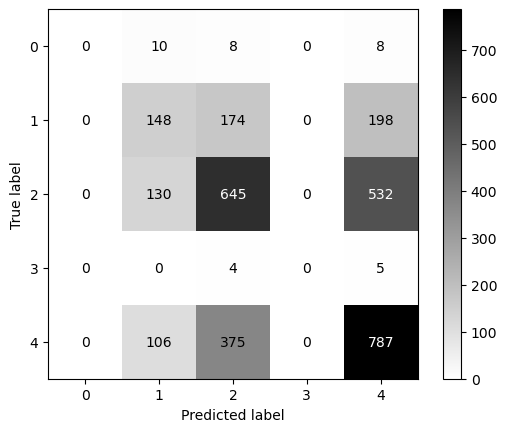

In [108]:
X = kclean[['balls', 'strikes', 'outs_when_up','on_1b','on_2b','on_3b']]
y = kclean[['pitch_type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

f1score = f1_score(y_test, y_pred, average = 'micro')
print("Model F1 Score:", f1score)
conmax = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=conmax).plot(cmap='gray_r')

Naive Bayes

In [89]:
X = kclean[['balls', 'strikes', 'outs_when_up','on_1b','on_2b','on_3b','pitcher']]
y = kclean[['pitch_type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nbmodel = MultinomialNB()
nbmodel.fit(X_train, y_train)
NBy_pred = nbmodel.predict(X_test)

nb_f1score = f1_score(y_test, NBy_pred, average = 'micro')
print("Model F1 Score:", f1score)
#conmax = confusion_matrix(y_test, NBy_pred, labels = )
#ConfusionMatrixDisplay(confusion_matrix=conmax).plot(cmap='gray_r')

c:\Users\tober\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model F1 Score: 0.4994794377928162


Multinomial Logistic Regression


In [93]:
X = kclean[['balls', 'strikes', 'outs_when_up','on_1b','on_2b','on_3b', 'pitcher']]
y = kclean[['pitch_type']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
LRmodel = LogisticRegression()
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)

f1score = f1_score(y_test, y_pred, average = 'micro')
print("Model F1 Score:", f1score)
#conmax = confusion_matrix(y_test, y_pred)
#ConfusionMatrixDisplay(confusion_matrix=conmax).plot(cmap='gray_r')

c:\Users\tober\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model F1 Score: 0.46434148880791254
